In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ATM_Data_Cleaned.csv")
df.head()

,Year,Month,ATM id,STATE,Fin Txn,Non Fin Txn,Monthly Txn,AVG Fin Txn,AVG Non Fin Txn,AVG Total TXN,...,Total Cost,Gross Profit,GROSS PROFIT %,ATM TYPE,MARGIN RANGE Current Month,TXN RANGE Current Month,TXN RANGE Previous Month,TXN RANGE Previous 2nd Month,Revenue Performance,Up Time
0,2024,November,TSFTSK000969151,Assam,3814.0,1464.0,5278.0,127.0,49.0,176.0,...,25971,30145,0.54,Regular,Above 30%,175 200,125 150,150 175,Above 50K,0.93
1,2024,November,TSFTSK000969154,Assam,2315.0,803.0,3118.0,77.0,27.0,104.0,...,61249,25535,0.71,Regular,Below 0%,100 125,50 75,175 200,35K 40K,0.46
2,2024,November,TSFTSK000969152,Assam,3008.0,928.0,3936.0,100.0,31.0,131.0,...,24593,20479,0.45,Regular,Above 30%,125 150,100 125,75 100,40K 50K,0.93
3,2024,November,TSFTSK000971358,Assam,2424.0,605.0,3029.0,81.0,20.0,101.0,...,19475,15644,0.45,Captive,Above 30%,100 125,75 100,50 75,35K 40K,1.00
4,2024,November,TSFTSK000971362,Assam,1632.0,299.0,1931.0,54.0,10.0,64.0,...,24399,78,0.00,Regular,Below 0%,50 75,75 100,75 100,20K 25K,0.73


In [3]:
total_revenue = df['Monthly Rev'].sum()
total_cost = df['Total Cost'].sum()
avg_profit = round(df['Gross Profit'].mean(),3)
avg_uptime = round(df['Up Time'].mean(),3)
print(f'total_revenue :  {total_revenue}\ntotal_cost    :  {total_cost}\navg_profit    :  {avg_profit}\navg_uptime    :  {avg_uptime}')


total_revenue :  574666629.0
total_cost    :  296284039
avg_profit    :  30920.865
avg_uptime    :  0.919


---
### Monthly Transactions vs Monthly Revenue (Scatter Plot with Regression Line)

**Purpose:**  
To visualize the relationship between **monthly transactions** and **monthly revenue** at ATMs, highlighting how transaction volume impacts revenue.

**Why it matters:**  
- Shows whether **higher transaction volumes drive more revenue**, helping prioritize high-traffic ATMs.  
- Supports **cash planning, resource allocation, and revenue forecasting**.  
- Identifies potential **outliers or underperforming ATMs** for operational improvements.


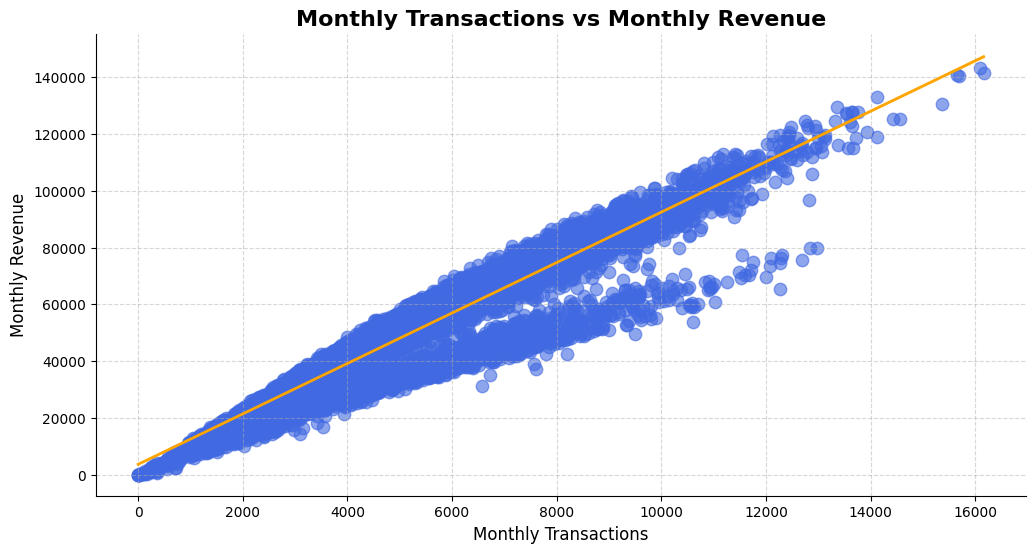

In [4]:
plt.figure(figsize=(12,6))

# Scatter plot with regression line
sns.regplot(
    x='Monthly Txn', 
    y='Monthly Rev', 
    data=df, 
    scatter=True, 
    fit_reg=True, 
    scatter_kws={'s':80, 'color':'royalblue', 'alpha':0.6},  # point size, color, transparency
    line_kws={'color':'orange', 'linewidth':2}              # regression line color and thickness
)

# Title and labels
plt.title('Monthly Transactions vs Monthly Revenue', fontsize=16, weight='bold')
plt.xlabel('Monthly Transactions', fontsize=12)
plt.ylabel('Monthly Revenue', fontsize=12)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()  # removes top and right spines for cleaner look

plt.show()

There is a **positive correlation** between **monthly transactions and revenue**.  
As **transaction volume increases**, **monthly revenue also rises**, indicating that higher ATM usage drives higher revenue.

---

### Revenue Contribution by State (Pie/Bar Chart)

**Purpose:** To show **which states generate the most revenue**.  

**Why it matters:**  
- Helps focus on **high-performing states**.  
- Identifies regions that may need **improvement or expansion**.


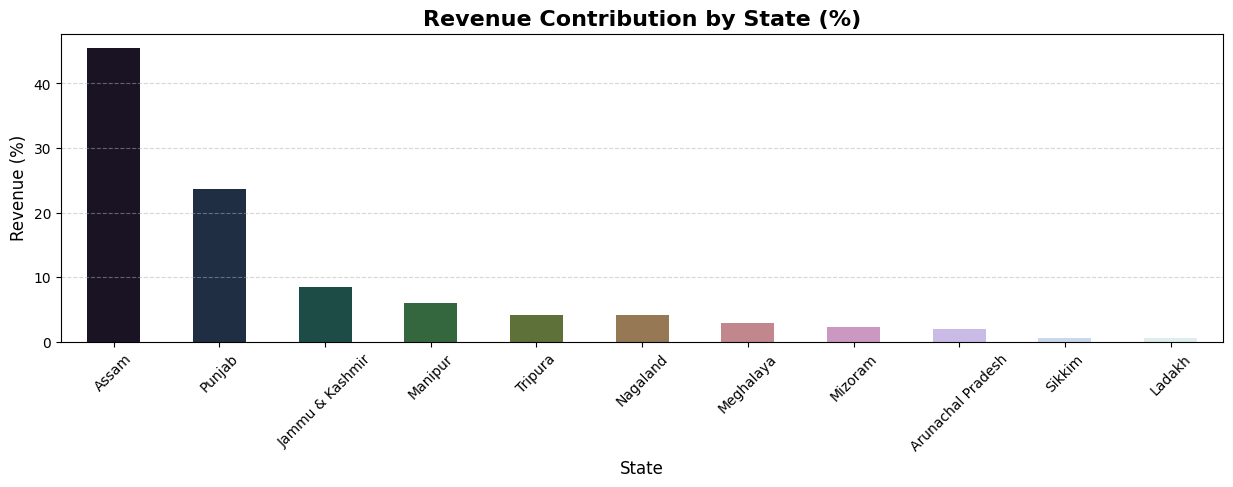

In [5]:
revenue_by_state = df.groupby('STATE')['Monthly Rev'].sum().sort_values(ascending=False)

# Calculate percentage share
revenue_percent = round((revenue_by_state / revenue_by_state.sum()) * 100,2)

plt.figure(figsize=(15,4))
sns.barplot(revenue_percent,
            palette='cubehelix',
            width= 0.5)

plt.title('Revenue Contribution by State (%)', fontsize=16, weight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Revenue (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Top Performers:** Assam (45.45%) and Punjab (23.59%) generate nearly **69% of revenue**; maintain focus on these states.  

**Mid-Level Performers:** Jammu & Kashmir (8.45%), Manipur (5.94%), Tripura (4.14%), Nagaland (4.12%) have moderate revenue; improve via **uptime and transaction volume**.  

**Low Revenue Contributors:** Meghalaya, Mizoram, Arunachal Pradesh, Sikkim, Ladakh (<10% total); consider **better ATM placement, cost optimization, and promotions**.  

**Key Insight:** Revenue is **highly concentrated**; diversifying ATM reach in smaller states will improve long-term stability.

---


### Gross Profit by State (Bar Chart)

**Purpose:** To highlight **profitability across different states**.  

**Why it matters:**  
- Identifies states where **ATM operations are most efficient**.  
- Highlights states that require **cost optimization** or strategic focus to improve profitability.


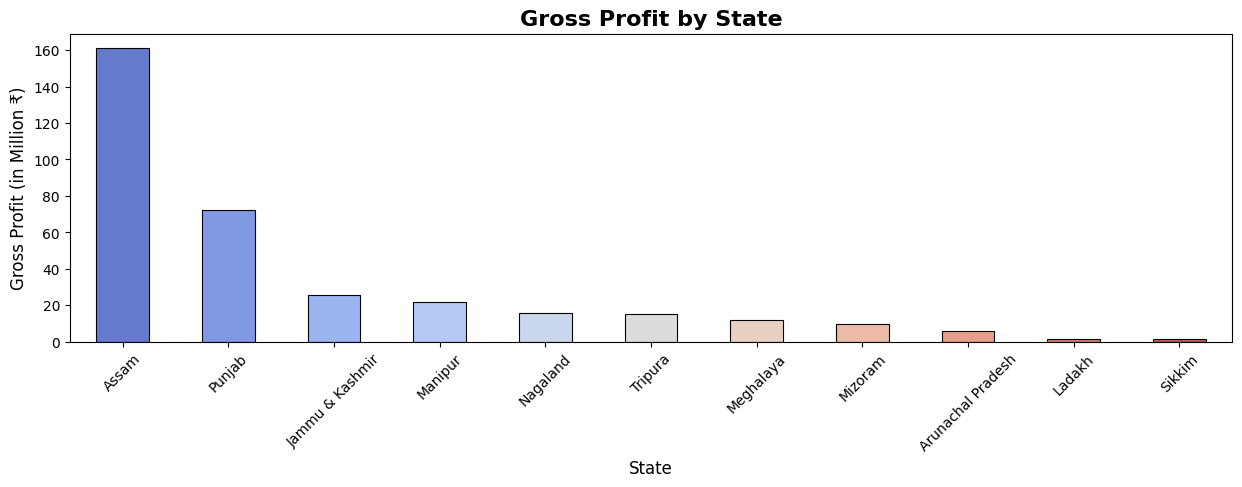

In [6]:
state_profit = df.groupby('STATE')['Gross Profit'].sum().sort_values(ascending=False)
state_profit_million = state_profit / 1_000_000
plt.figure(figsize=(15,4))
sns.barplot(state_profit_million,
            palette= 'coolwarm',
            width= 0.5,
            edgecolor = 'Black',
            linewidth = 0.8)

plt.title('Gross Profit by State', fontsize=16, weight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Gross Profit (in Million ₹)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

The bar chart shows **Assam** leads with the highest **gross profit (₹161M)**, making it the strongest performing state and a key focus area for future growth. **Punjab** follows at **₹72M**, indicating good performance but still behind Assam.  

States like **Jammu & Kashmir, Manipur, Nagaland, and Tripura** show moderate profits between **₹15–25M**, suggesting steady performance with room for improvement through better operations or marketing.  

**Meghalaya, Mizoram, and Arunachal Pradesh** record lower profits, reflecting potential logistical or market challenges. **Ladakh and Sikkim** have minimal profits (under **₹2M**), indicating limited market reach.  

Overall, profitability is highly **concentrated in Assam and Punjab**, while other regions show **growth potential** with strategic optimization.

---


### Monthly Revenue Trend (Line Chart)

**Purpose:** To track **ATM revenue trends over the months**.  

**Why it matters:**  
- Highlights **peak periods** to optimize **cash management**, **staffing**, and **maintenance schedules**.  
- Helps identify **seasonal or cyclical patterns** in ATM usage.


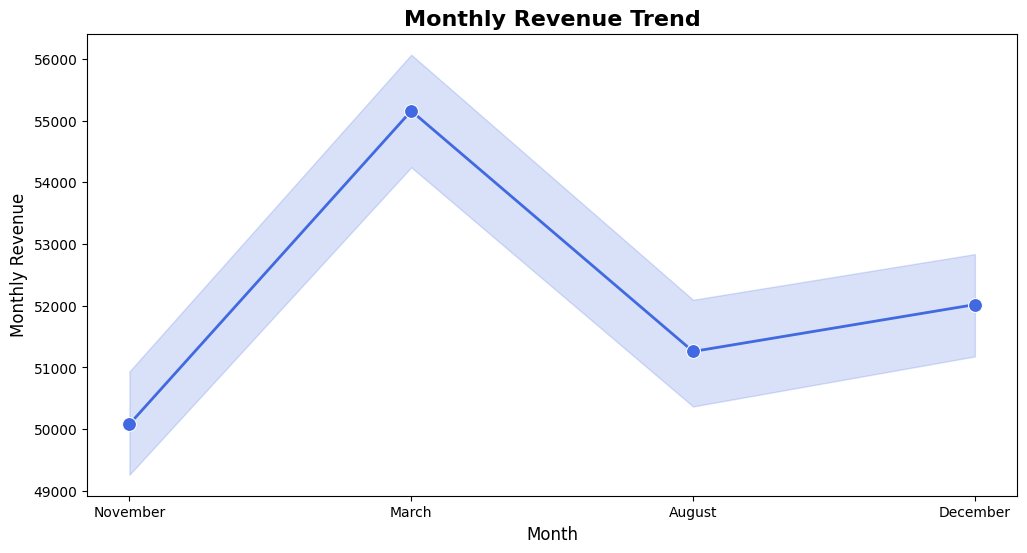

In [7]:
plt.figure(figsize=(12,6))

# Line plot with markers
sns.lineplot(
    data=df, 
    x='Month', 
    y='Monthly Rev', 
    marker='o', 
    color='royalblue', 
    linewidth=2,       # thicker line
    markersize=10      # bigger markers
)

# Title and labels
plt.title('Monthly Revenue Trend', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Monthly Revenue', fontsize=12)

# Grid and style
#plt.grid(True, linestyle='--', alpha=0.5)
#sns.despine()  # clean top and right spines

plt.show()

The **monthly revenue** shows a clear upward trend from **November (₹50,000)** to **March (₹55,000)**.  
**December (₹52,000)** and **August (₹51,000)** had stable revenues, indicating **consistent ATM usage** during these months.  
**March** stands out as the **highest revenue month**, suggesting increased customer activity, possibly due to **year-end transactions or financial settlements**.

---

### Total Cost vs Gross Profit (Bar/Line Chart)

**Purpose:** To compare **total expenses** against **gross profits** across different states.  

**Why it matters:**  
- Reveals **tight-margin areas** and highlights **profitable vs less profitable regions**.  
- Guides **budgeting, cost management**, and **strategic decision-making** for ATM operations.


In [9]:
state_summary = df.groupby('STATE')[['Total Cost','Gross Profit']].sum().sort_values('Gross Profit', ascending=False)

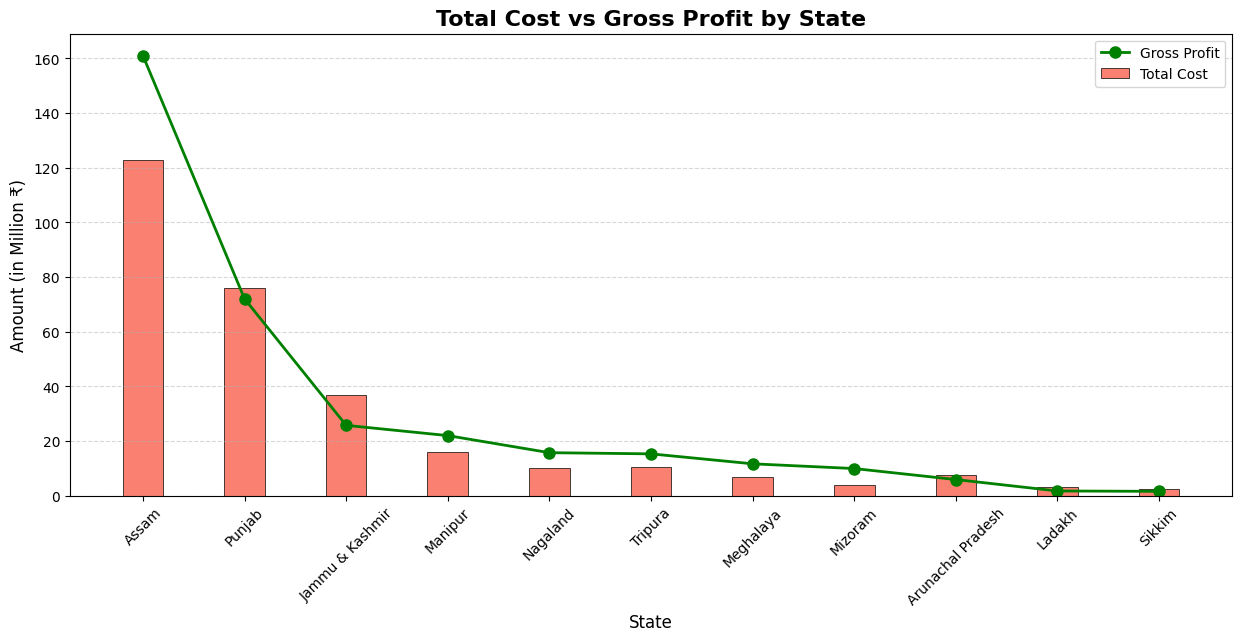

In [10]:
plt.figure(figsize=(15,6))

# Bar chart for Total Cost
bars = plt.bar(
    state_summary.index, 
    state_summary['Total Cost']/1_000_000,  # convert to millions
    color='salmon', 
    width=0.4, 
    label='Total Cost', 
    edgecolor='black', 
    linewidth=0.5
)

# Line chart for Gross Profit
plt.plot(
    state_summary.index, 
    state_summary['Gross Profit']/1_000_000,  # convert to millions
    color='green', 
    marker='o', 
    linewidth=2, 
    markersize=8, 
    label='Gross Profit'
)

# Title and labels
plt.title('Total Cost vs Gross Profit by State', fontsize=16, weight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Amount (in Million ₹)', fontsize=12)
plt.xticks(rotation=45)

# Grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.show()

---
**Assam** leads with a **gross profit of ₹161M** against a **total cost of ₹123M**, showing strong profitability.  
**Punjab** (**₹72M profit, ₹76M cost**) and **Jammu & Kashmir** (**₹25.7M profit, ₹37M cost**) have tighter margins.  
**Manipur (₹21.9M, ₹15.9M)**, **Nagaland (₹15.7M, ₹10M)**, and **Tripura (₹15.3M, ₹10.4M)** are moderately profitable.  
**Meghalaya (₹11.6M, ₹6.6M)**, **Mizoram (₹9.9M, ₹4M)**, **Arunachal Pradesh (₹5.8M, ₹7.5M)**, **Ladakh (₹1.7M, ₹3.3M)**, and **Sikkim (₹1.56M, ₹2.3M)** show lower margins, highlighting opportunities for **cost optimization and strategic focus**.

---

### Financial vs Non-Financial Transactions (Stacked Bar Chart)

**Purpose:** To compare **cash-related (financial) transactions** versus **service-related (non-financial) transactions** at ATMs.  

**Why it matters:**  
- Helps optimize **ATM placement**, **cash management**, and **service offerings** based on **customer usage patterns**.


In [11]:
txn_summary = df.groupby('STATE')[['Fin Txn','Non Fin Txn']].sum().sort_values('Fin Txn', ascending=False)
txn_summary_million = txn_summary / 1_000_000
# Reset index and melt to long format
txn_long = txn_summary.reset_index().melt(id_vars='STATE', 
                                          value_vars=['Fin Txn','Non Fin Txn'], 
                                          var_name='Transaction Type', 
                                          value_name='Count')
txn_long['Count'] = txn_long['Count']/1_000_000
txn_long

,STATE,Transaction Type,Count
0,Assam,Fin Txn,21.355536
1,Punjab,Fin Txn,12.853367
2,Jammu & Kashmir,Fin Txn,4.286540
3,Manipur,Fin Txn,2.711935
4,Nagaland,Fin Txn,1.908288
5,Tripura,Fin Txn,1.904959
6,Meghalaya,Fin Txn,1.463081
7,Mizoram,Fin Txn,1.179834
8,Arunachal Pradesh,Fin Txn,0.945400
9,Ladakh,Fin Txn,0.283131


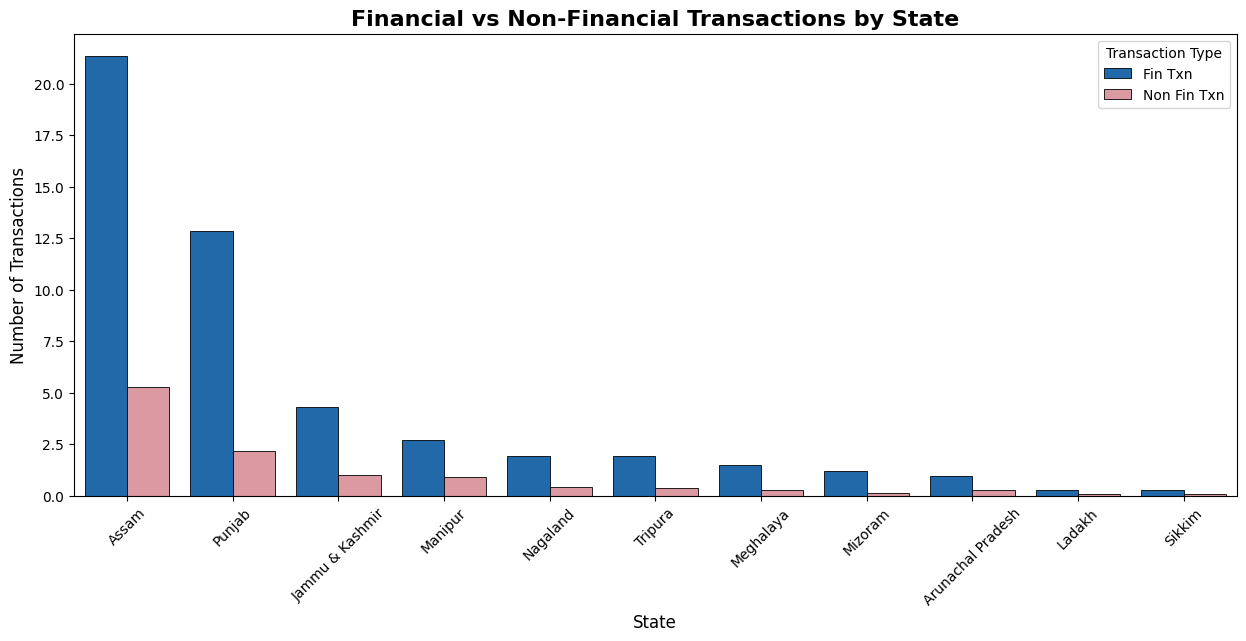

In [12]:
plt.figure(figsize=(15,6))

# Clustered bar chart
sns.barplot(
    data=txn_long, 
    x='STATE', 
    y='Count', 
    hue='Transaction Type', 
    palette=['#0B6BBF','#E68E99'],
    edgecolor = 'Black',
    linewidth = 0.6
)

# Title and labels
plt.title('Financial vs Non-Financial Transactions by State', fontsize=16, weight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)


plt.legend(title='Transaction Type')
plt.show()

---
**Assam** leads with **21.36M financial** and **5.28M non-financial transactions**, followed by **Punjab (12.85M, 2.17M)**.  
Mid-level states like **Jammu & Kashmir, Manipur, Nagaland, and Tripura** show moderate activity, while smaller states such as **Meghalaya, Mizoram, Ladakh, and Sikkim** have low transactions.  
Overall, **financial transactions dominate**, highlighting cash usage as the primary ATM service. This insight can guide **ATM placement and cash planning**.

---

### ATM Uptime Analysis (Bar Chart)

**Purpose:** To display the **average uptime of ATMs across different states**.  

**Why it matters:**  
- High uptime ensures **better service availability**, **customer satisfaction**, and **higher revenue**.  
- Low uptime highlights **maintenance or operational issues** that can negatively impact transactions and profits.


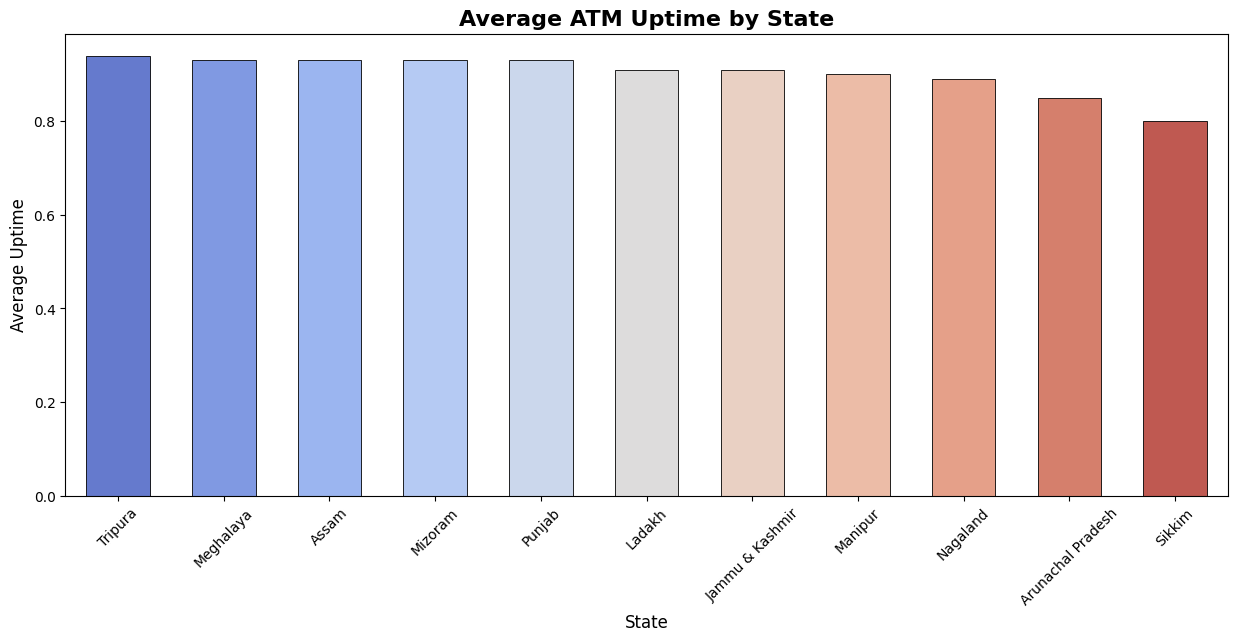

In [13]:
uptime_summary = round(df.groupby('STATE')['Up Time'].mean().sort_values(ascending=False), 2)

uptime_df = uptime_summary.reset_index()

plt.figure(figsize=(15,6))

# Bar chart
sns.barplot(
    data=uptime_df, 
    x='STATE', 
    y='Up Time', 
    palette='coolwarm', 
    edgecolor='black', 
    linewidth=0.6,
    width= 0.6
)

# Title and labels
plt.title('Average ATM Uptime by State', fontsize=16, weight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Uptime', fontsize=12)
plt.xticks(rotation=45)


plt.show()


**Tripura** leads with **94% uptime**, followed by **Meghalaya, Assam, Mizoram, and Punjab** at **93%**, indicating highly reliable ATM operations.  
**Ladakh and Jammu & Kashmir** are at **91%**, while **Manipur, Nagaland, Arunachal Pradesh, and Sikkim** are lower (**80–90%**).  
States with lower uptime may experience **reduced transactions and revenue**, highlighting the need for **targeted maintenance and monitoring**.

---

### Visualizing ATM Cost Components

The **proportion of ATM cost components** is visualized to understand how different operational expenses contribute to the total ATM costs. This includes **ATM AMC, UPS spare repairs, VSAT AMC, site maintenance, and UPS AMC**.

**Why this is important:**  
- It helps identify the **largest cost drivers** in ATM operations.  
- Provides insights for **cost optimization** and **budget allocation**.  
- Highlights areas where **operational efficiency** can be improved without compromising service quality.  
- Supports **strategic decision-making** for maintenance planning and resource prioritization.  


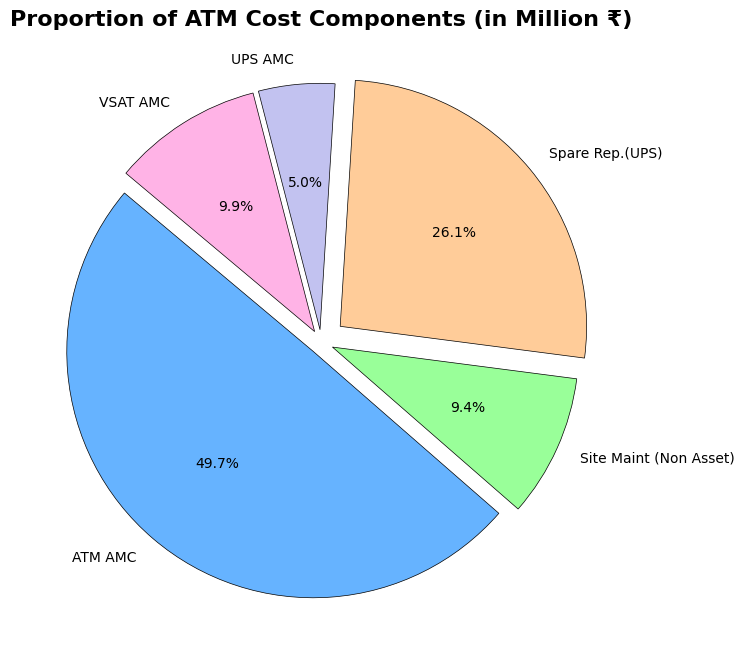

In [14]:
# Sum the relevant cost components
cost_components = df[['ATM AMC','Site Maint (Non Asset)','Spare Rep.(UPS)','UPS AMC','VSAT AMC']].sum()
cost_components_million = cost_components / 1_000_000

# Explode: slightly separate some slices for emphasis
explode = [0.05, 0.05, 0.1, 0.05, 0.05]  # adjust which slices to highlight

# Pie chart with exploded slices
plt.figure(figsize=(8,8))
plt.pie(
    cost_components_million, 
    labels=cost_components_million.index, 
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'],
    explode=explode,
    wedgeprops={'edgecolor':'black', 'linewidth':0.5}
)

plt.title('Proportion of ATM Cost Components (in Million ₹)', fontsize=16, weight='bold')
plt.show()

ATM operational costs are primarily driven by **ATM AMC (49.7%)** and **UPS spare repairs (26.1%)**, making them the largest expenses.  
**VSAT AMC (9.9%)** and **site maintenance (9.4%)** contribute moderately, while **UPS AMC (5%)** is minimal.  

To optimize overall expenses without affecting service quality, the focus should be on **reducing ATM AMC and spare repair costs**.